# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 12 X-ray diffraction II

We haven't learned some basic theories regarding how to calculate the PXRD in the last classes. 
Now we are going to assemble all the codes which we have to complete the entire project.


## 12.1 Interplanar spacing

How many differents spacing we can have in a crystal? If we represent the crystal as a periodic packing of atoms in the three dimensional space. According to the [_Miller indices_](https://en.wikipedia.org/wiki/Miller_index), 
we can calculate any arbitray $d_{hkl}$ from 1/$g_{hkl}$ based on the reciprocal lattice

$$g_{hkl} = h \cdot b_1 + k \cdot b_2 + c \cdot b_3 $$

where $b_1, b_2, b_3$ are the reciprocal lattice vectors, which satisfy the following conditions:
$$ b_1 = \frac{a2 \times a3} {V}$$
$$ b_2 = \frac{a3 \times a1} {V}$$
$$ b_3 = \frac{a1 \times a2} {V}$$

in which $V$ is the volume of the real space lattice.

Suppose the box is a cube described by
$$
\begin{bmatrix}
    a & 0 & 0 \\
    0 & a & 0 \\
    0 & 0 & a
\end{bmatrix}
$$

It is much easier for the case of cubic lattice, in which b1=b2=b3=1/a. 
Therefore, the interplanar spacing $d$ is

$$ d_{hkl} = \frac{a}{\sqrt{h^2+k^2+l^2}} $$

Formally defined as the interplanar spacing between successive (hkl) planes passing through the corners of the unit cell.
- also may be defined as the distance between the origin and the nearest (hkl) plane.
- this distance is only for crystals with orthogonal axes (cubic, tetragonal,orthorhombic)
- the cubic case is the only case where three lattice parameters are equal

Remember that the truncation of (hkl) planes is

$$ d_\text{min} = \frac{\lambda}{2}$$

according to the Bragg's law.

We start by initializing some structure, above this structure is the diagonal matrix with lattice vectors a. From this lattice structure, the goal is to calculate all possible (hkl) planes and interplanar spacings d that satisfy two conditions:
1. (h,k,l) can't be (0,0,0). Geometrically this isn't a plane, and mathematically the interplananr distance is infinite.
2. The planar spacing is greater than the the cutoff wavelength/2. If this isn't the case, the interacting photons will not be able to penetrate the crystal structure, leading to zero XRD.

So, the a/d_min condition will define the search area, while the dum > 0 and a/sum > dmin condition ensures diffraction.

In [21]:
# Write a program to calculate all possible (hkl) planes and the corresponding d spacing for the following condition
# 1, wavelength is 1.5487 Å 
# 2, lattice is a cube with a unit length of 3.5 Å.
from math import sqrt
import numpy as np
def all_dhkl(a, wavelength):
    """ 3x3 representation -> 1x6 (a, b, c, alpha, beta, gamma)"""
    d_min = wavelength/2
    d_hkl = []
    hkl_list = []
    h1 = int(a/d_min) # I am not certain where this condition comes from
    for h in range(-h1,h1+1):
        for k in range(-h1,h1+1):
            for l in range(-h1,h1+1):
                sum_d = sqrt(h**2+k**2+l**2)
                if sum_d > 0 and a/sum_d > d_min:
                    d_hkl.append(a/sum_d)
                    hkl_list.append([h,k,l])
    d_hkl = np.array(d_hkl) # list of distances of hkl planes from the origin
    hkl_list = np.array(hkl_list) # list of all hkl planes
    seq = np.argsort(1/d_hkl)
    return np.array(hkl_list)[seq,:]

hkl_list = all_dhkl(1, 1.5) # get hkl planes and distances for some lattice vector and wavelength
print(hkl_list)

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]
 [ 0  0  1]
 [ 0  1  0]
 [ 1  0  0]]


## Below are functions to calculate the intensity, atom_scattering factor, and the structural factor. Explanations of each will be in reverse order.
- most factors involve a fourier transform of a spatial density distribution of the scattering object from real space to recipricol space 

### Structual factor: How material scatters radiation. 
- In the case of crystal structures, the structure factor is denoted by F_{hkl} or F.
- F relates the amplitude and phase of the beam diffracted by the hkl planes.
- F will result in the calculation of the intensity.

$$F_{hkl} = \sum_{j=1}^N f_j e^{-2\pi i(hx_j+ky_j+lz_j)}$$

- N is the number of atoms in the unit cell, (x_j,y_j,z_j) are j-th atom positions, f_j is the scattering facotr  of the j-th atom. x, y, and z are also the locations of the lattice points. (hkl) is the recipricol lattice point.
- In a nutshell, F is the vector sum of waves from all atoms within the unit cell.

### Atomic scattering factor: scattering amplitude of a wave by an isolated atom
- dependent on the nature of incident photons
- for crystals atomic form factors are utilized to find the structual factor for some Bragg peak.
- physically, XRAYs are scattered by the e- cloud of the atom. Higher Z implies increasing scattering amplitude (similar to the transmission coefficient for a some quantum potential).
- Elements with low Z will rarely interact with light.
- The atomic scattering factor f, is usually a function of the scattering vector 

$$q = \frac{4\pi}{\lambda}sin(\theta)$$

- Here $2\theta$ is the angle between the incident x-ray beam and the detector measuring the scattered intensity, and $\lambda$ is the incident wavelength of XRAYs
- The scattering vector is synonymous to the resolution with which the sample is observed.
- In the range $0<q<25 A^{-1}$

$$f(q) = \sum_{i=1}^4a_iexp(-b_i(\frac{q}{2\pi})^2+c$$

### Intensity
- The intensity is given by the modulus square of F

In [26]:
# Write a program to calculate all possible (100) planes for the following condition
# 1, wavelength is 1.5487 Å 
# 2, lattice is a cube with a unit length of 3.5 Å.
# 3，coordinates are 
#    Na1(0,0,0), Na2(0,1/2,1/2), Na3(1/2,1/2,0), Na4(1/2,0,1/2)
#    Cl1(0,1/,0), Cl2(0,0,1/2), Cl3(1/2,0,0), Cl4(1/2,1/2,1/2)

import numpy as np
from math import asin, sin, cos, exp, pi
def intensity(wavelength, cubic, position, hkl):
    # input some incident wavelength, lattice vector, 
    # lattice points (atom positions), and hkl plane
    
    """" Calculate intensity """
    h,k,l = hkl # hkl plane
    d = cubic/sqrt(h**2+k**2+l**2) # calculate distance from origin
    sintheta = wavelength/2/d # bragg's law
    theta = asin(sintheta) # calculate the incident angle 
    # sintheta/wavelength is synonymous to q
    f = atom_scatter(sintheta/wavelength) # get atomic scattering factor
    F = structure_factor(f, position, hkl) # calculate structual factor
    # LP*L give the lorentz polarization correction for each hkl
    LP = 1/sin(theta)**2/cos(theta) 
    P = 1 + cos(2*theta)**2
    # Intensity with correction factor
    I = (np.abs(F))**2*LP*P
    return I

def atom_scatter(d0):
    """ scattering factor """
    f = []
    # atom_type is used so that the correct atomic form factors are used in calculation
    # for each atom, 
    atom_type = [0,0,0,0,1,1,1,1] 
    # tabulated atomic form factors
    s = [[4.763, 3.174, 1.267, 1.113, 3.285, 8.842, 0.314, 129.424, 0.676],
         [11.46, 7.196, 6.256, 1.645, 0.01, 1.166, 18.519, 47.778, -9.557]]
    count = 0
    for i in atom_type:
        c = s[i]
        f_tmp = c[0]*np.exp(-c[4]*d0) + c[1]*np.exp(-c[5]*d0) + c[2]*np.exp(-c[6]*d0) + c[3]*np.exp(-c[7]*d0) + c[8]
        f.append(f_tmp)
    return f
   
def structure_factor(f, pos, hkl):
    """ N*1 array"""
    F = 0
    h,k,l=hkl # recipricol lattice points, (hkl plane)
    for fj, xyz in zip(f, pos):
        x,y,z = xyz # lattice point
        F += fj*np.exp(2*pi*(1j)*(h*x + k*y+ l*z)) 
                    
    return F



In [27]:
pos =  [[0,0,0],
        [0.5,0.5,0],
        [0,0.5,0.5],
        [0.5,0,0.5],
        [0.5,0.5,0.5],
        [0.5,0,0],
        [0,0,0.5],
        [0,0.5,0]]

hkl = [2,2,0]
print(hkl, intensity(1.54184, 5.692, pos, hkl)) # set h+k+l = even number
hkl = [2,1,3]
print(hkl, intensity(1.54184, 5.692, pos, hkl)) # set h+k+l = odd number


shape [11.46, 7.196, 6.256, 1.645, 0.01, 1.166, 18.519, 47.778, -9.557]
[2, 2, 0] 23933.529932340676
shape [11.46, 7.196, 6.256, 1.645, 0.01, 1.166, 18.519, 47.778, -9.557]
[2, 1, 3] 1.3506208996787634e-29


In [57]:
# We can now output the intensities for all hkls
def xrd_by_hkls(wavelength, cubic, pos, hkl_list):
    for hkl in hkl_list:
        h,k,l = hkl
        i = intensity(wavelength, cubic, pos, hkl)
        if i > 1:
            print("[%2d %2d %2d] %6.2f" %(h,k,l,i))
            
xrd_by_hkls(1.54184, 5.692, pos, hkl_list)

[ 1 -1 -1] 3868.66
[ 1  1 -1] 3868.66
[-1 -1 -1] 3868.66
[ 1 -1  1] 3868.66
[ 1  1  1] 3868.66
[-1  1 -1] 3868.66
[-1  1  1] 3868.66
[-1 -1  1] 3868.66
[ 0  2  0] 68297.73
[ 0  0 -2] 68297.73
[-2  0  0] 68297.73
[ 0 -2  0] 68297.73
[ 0  0  2] 68297.73
[ 2  0  0] 68297.73
[-2  2  0] 23933.53
[ 2  2  0] 23933.53
[-2  0  2] 23933.53
[-2 -2  0] 23933.53
[-2  0 -2] 23933.53
[ 0 -2 -2] 23933.53
[ 2 -2  0] 23933.53
[ 2  0 -2] 23933.53
[ 0  2  2] 23933.53
[ 2  0  2] 23933.53
[ 0 -2  2] 23933.53
[ 0  2 -2] 23933.53
[-3  1 -1] 1170.29
[-1 -1  3] 1170.29
[-3  1  1] 1170.29
[ 3 -1  1] 1170.29
[-1 -3 -1] 1170.29
[-3 -1  1] 1170.29
[-1  1  3] 1170.29
[-3 -1 -1] 1170.29
[ 1 -3  1] 1170.29
[ 3  1  1] 1170.29
[ 1  1  3] 1170.29
[ 3 -1 -1] 1170.29
[-1 -3  1] 1170.29
[ 1 -3 -1] 1170.29
[-1  1 -3] 1170.29
[ 3  1 -1] 1170.29
[ 1  1 -3] 1170.29
[ 1 -1 -3] 1170.29
[ 1  3  1] 1170.29
[-1  3 -1] 1170.29
[ 1 -1  3] 1170.29
[-1 -1 -3] 1170.29
[ 1  3 -1] 1170.29
[-1  3  1] 1170.29
[-2 -2  2] 12452.05
[-2  2 -2] 1

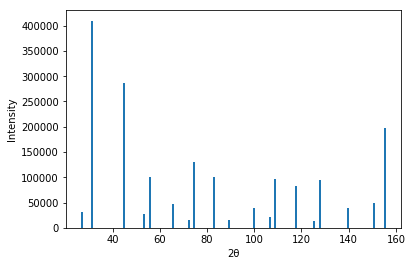

27.134628700330037 30949.3171819
31.43308997068069 409786.358653
45.04918485643573 287202.359188
53.384871543033654 28086.8779157
55.96154010436182 99616.4074451
65.60663124402394 46500.438957
72.36594753728141 15338.3401067
74.55883104451698 130333.145975
83.13683716012694 100627.504129
89.4593571122345 14762.9810203
100.02058274720915 38859.1035053
106.50294501991175 21054.4125757
108.70842016343906 96099.8494062
117.87229574297378 81811.2688555
125.27946735209758 13078.4901391
127.8976383841211 93975.860045
139.55269289999802 39938.2556157
150.5827062704211 49778.3816575
155.1966785838556 196943.030417


In [81]:
import matplotlib.pyplot as plt
from math import degrees

def plot_pxrd(wavelength, cubic, pos, hkl_list):
    theta2 = []
    pxrd_intensity = []
    for hkl in hkl_list:
        h,k,l = hkl
        i = intensity(wavelength, cubic, pos, hkl)
        if i > 1:
            d = cubic/sqrt(h**2+k**2+l**2)
            sintheta = wavelength/2/d
            theta = degrees(asin(sintheta))
            if len(pxrd_intensity) == 0:
                pxrd_intensity.append(i)
                theta2.append(2*theta)
            elif abs(theta*2-theta2[-1])<0.001:
                pxrd_intensity[-1] += i
            else:
                pxrd_intensity.append(i)
                theta2.append(2*theta)
                
    plt.bar(theta2, pxrd_intensity)
    plt.xlabel('2θ')
    plt.ylabel('Intensity')
    plt.show()

    for theta, i in zip(theta2, pxrd_intensity):
        print(theta, i)
    
plot_pxrd(1.54184, 5.692, pos, hkl_list)

## 12.3 Further Reading


### Code
The above code indeed could calculate XRD very well. However, it is gonna be insufficient when you have many hkl planes to calculate.

Therefore, it could be further improved in two aspects
- __verctorization__, one could try to kill those unnecessary for loops by following the recipes which we mentioned in the previous classes
- __class design__, since there are many variables to deal with, it is better to assemble them into several classes

I created a [github page](https://github.com/qzhu2017/XRD) while preparing for the lecture notes
